In this work, we will use logistic regression to to predict if the client will subscribe a bank term deposit. The [dataset](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#) used is related with direct marketing campaigns of a Portuguese banking institution.  The data set comprised of all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

Source: <br>
*S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014*



In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('bank-marketing-portuguese.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
# check data info
data.describe

<bound method NDFrame.describe of        age          job  marital  ... euribor3m nr.employed    y
0       56    housemaid  married  ...     4.857      5191.0   no
1       57     services  married  ...     4.857      5191.0   no
2       37     services  married  ...     4.857      5191.0   no
3       40       admin.  married  ...     4.857      5191.0   no
4       56     services  married  ...     4.857      5191.0   no
...    ...          ...      ...  ...       ...         ...  ...
41183   73      retired  married  ...     1.028      4963.6  yes
41184   46  blue-collar  married  ...     1.028      4963.6   no
41185   56      retired  married  ...     1.028      4963.6   no
41186   44   technician  married  ...     1.028      4963.6  yes
41187   74      retired  married  ...     1.028      4963.6   no

[41188 rows x 21 columns]>

In [19]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [20]:
data['y'].head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

Since the data set has specific the column ' **y** ' as output dependent variable. Therefore, we will first select two of the features as independent variables to predict will the client subscribed the bank term deposit. We select the frequency of contact to client in campaign as our learning parameter. The column named '**campaign**' which is number of contacts performed during this campaign and for this client. Another attribute information named '**duration**' is last contact duration which is highly affects the output target.

Before experiment, we assume the higher the contact frequency in current campaign and the longer duration of last contact, the higher probability that the client will subscribe the bank deposit plan.

In [21]:
freq_call = data['campaign'].sort_values(ascending=False)
freq_call

4107     56
18728    43
13447    43
5304     42
4168     42
         ..
30144     1
30143     1
30142     1
30141     1
0         1
Name: campaign, Length: 41188, dtype: int64

In [22]:
call_duration = data['duration'].sort_values(ascending=False)
call_duration

24091    4918
22192    4199
40537    3785
13820    3643
7727     3631
         ... 
28239       1
6251        0
28063       0
23031       0
33015       0
Name: duration, Length: 41188, dtype: int64

In [23]:
input_attribute = ['campaign', 'duration', 'y']
combine_X = data[input_attribute]
combine_X

,campaign,duration,y
0,1,261,no
1,1,149,no
2,1,226,no
3,1,151,no
4,1,307,no
...,...,...,...
41183,1,334,yes
41184,1,383,no
41185,2,189,no
41186,1,442,yes


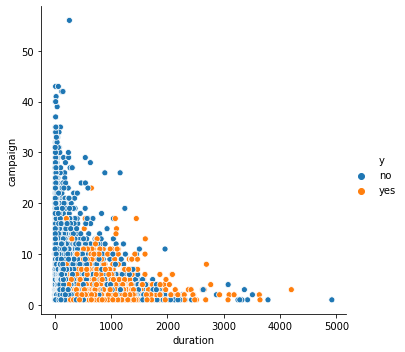

In [24]:
sns.relplot(x="duration", y="campaign", hue="y", data=combine_X);

There are interesting finding. A contact to a client is performed 56 times in the campagin but the client no subscibe the plan, while the longest duration in last contact is 4918 seconds, but still no subscribe to the plan. Hence, our previous assumption is wrong!

# **Logistic Regression Model**

Given a set of inputs, we want to assign them to one of two possible categories (0 or 1) for no or yes respectivaly.

The logistic is using sigmoid function which can be write as
```
g(z) = 1 / (1 + np.exp(-z))
```

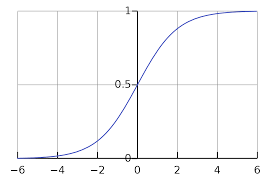

Cost function as follow:
![Cost function of logistic regression](https://miro.medium.com/max/2908/1*dEZxrHeNGlhfNt-JyRLpig.png)

In [0]:
class LogisticRegressionModel:
    def __init__(self, iteration=1000, alpha=0.01, fit_theta_0=True, verbose=False):
        self.learning_rate = alpha
        self.iteration = iteration
        self.fit_theta_0 = fit_theta_0
        self.verbose = verbose
    
    def add_theta_0(self, X):
        theta_0 = np.ones((X.shape[0], 1))
        return np.concatenate((theta_0, X), axis=1)
    
    def sigmoid_function(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_theta_0:
            X = self.add_theta_0(X)
        
        self.theta_1 = np.zeros(X.shape[1])
        
        for i in range(self.iteration):
            z = np.dot(X, self.theta_1)
            h = self.sigmoid_function(z)
            slope = np.dot(X.T, (h - y)) / y.size
            self.theta_1 -= self.learning_rate * slope
            
            z = np.dot(X, self.theta_1)
            h = self.sigmoid_function(z)
            loss = self.cost_function(h, y)
                
            if(self.verbose ==True and i % 1000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_theta_0:
            X = self.add_theta_0(X)
    
        return self.sigmoid_function(np.dot(X, self.theta_1))
    
    def predict(self, X):
        return self.predict_prob(X)

    def check_accuracy(self, X, preds, y):
      correct_pred = np.count_nonzero(preds == y)
      accuracy = correct_pred/X.shape[0]
      return accuracy

In [149]:
X = combine_X[['campaign','duration']]
X = np.array(X)
X.shape

(41188, 2)

Since y column given is in string type which is either yes or no, so we have to convert it into binary which is 1 or 0.

In [114]:
y = combine_X[['y']].replace(to_replace=['no', 'yes'], value=[0, 1])
y = np.array(y).reshape(-1,)
y.shape

(41188,)

In [0]:
model = LogisticRegressionModel(1000, 0.01)

In [137]:
model.fit(X, y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


In [138]:
model.theta_1

array([-1.08183867, -2.42556222,  0.10446343])

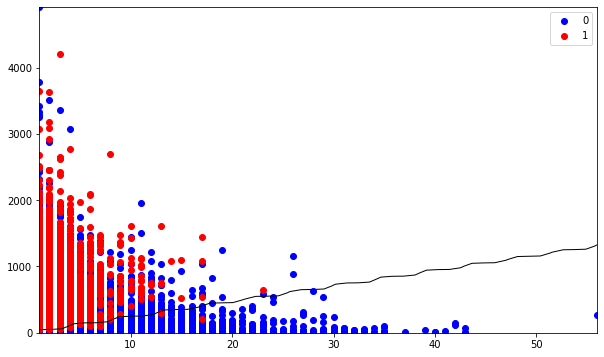

In [139]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

In [140]:
preds = model.predict(X)
preds

array([1.        , 0.9999942 , 1.        , ..., 0.999999  , 1.        ,
       0.99999994])

In [155]:
model.check_accuracy(X, preds, y)

0.0609400796348451

The accuracy seem like very low, therefore, we can try to increase the accuracy by adjust the iteration number and the learning rate.

In [167]:
# adjust the iteration number
num_iteration = [100, 1000, 2000, 5000, 10000, 40000]
accuracy = []

for i in num_iteration:
  model = LogisticRegressionModel(i, 0.01)
  model.fit(X,y)
  preds = model.predict(X)
  accuracy.append(model.check_accuracy(X, preds, y))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


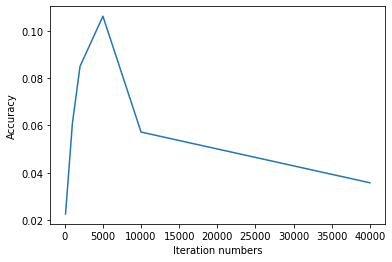

In [168]:
plt.plot(num_iteration, accuracy)
plt.xlabel('Iteration numbers')
plt.ylabel('Accuracy')
plt.show()

From the graph, we can see that 5000 iteration has highest accuracy among the set of iteration number.

In [171]:
# adjust the learning rate
alpha = [0.001, 0.01, 0.1, 0.5, 0.9]
accuracy = []

for i in alpha:
  model = LogisticRegressionModel(5000, i)
  model.fit(X,y)
  preds = model.predict(X)
  accuracy.append(model.check_accuracy(X, preds, y))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


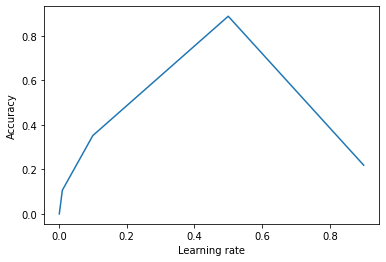

In [173]:
plt.plot(alpha, accuracy)
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.show()

The optimum learning rate is 0.5 since it has the highest accuracy in the learning rate set.

In [176]:
model = LogisticRegressionModel(5000, 0.5)
model.fit(X,y)
preds = model.predict(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


In [179]:
model.check_accuracy(X, preds, y)

0.8873458288821987

# **Improvment Steps**

There are few improvise action can be considered in future to improve the model:

1.   Select the attribute that can provide more information
2.   Try add additional features for model learning
3.   Trying polynomial features

